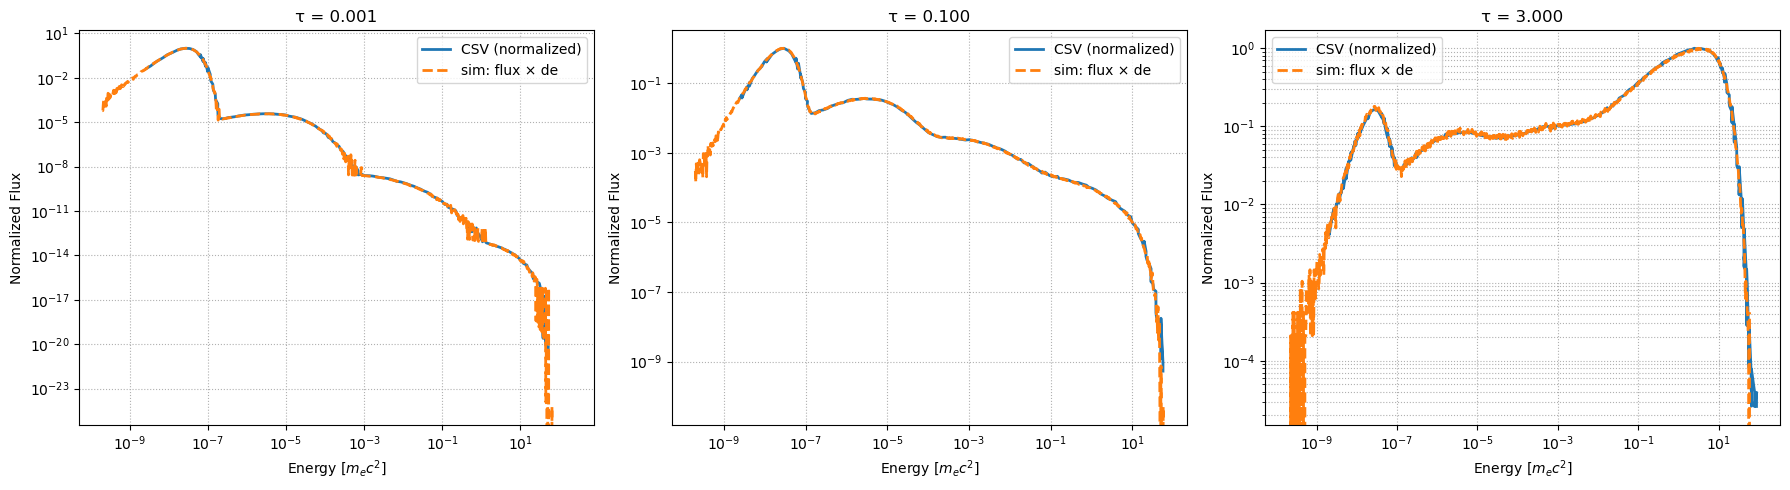

In [63]:
import os
import struct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------- 读取二进制 .dat 文件函数 -----------
def load_dat_file(file_path):
    """
    读取二进制 .dat 文件并解析其中的数据（假设数据是双精度浮动点数）。
    """
    if not os.path.exists(file_path):
        print(f"文件 {file_path} 不存在！")
        return None

    with open(file_path, "rb") as f:
        data = f.read()

    num_items = len(data) // 8  # double = 8 bytes
    result = struct.unpack("<" + "d" * num_items, data)
    return np.array(result)

# ----------- 路径和文件设置 -----------
base_dir = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\verify"
csv_files = ["f2.csv", "f3.csv", "f4.csv"]
tau_dirs = ["te_4.000_tau_0.0001", "te_4.000_tau_0.100", "te_4.000_tau_3.000"]
titles = ["τ = 0.001", "τ = 0.100", "τ = 3.000"]

# ----------- 创建子图 -----------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    ax = axes[i]
    
    # ----- ① 读取 CSV 文件 -----
    csv_path = os.path.join(base_dir, csv_files[i])
    df = pd.read_csv(csv_path)
    x_csv = df.iloc[:, 0]
    y_csv = df.iloc[:, 1]
    y_csv_norm = y_csv / np.max(y_csv)  # ✅ 归一化

    ax.plot(x_csv, y_csv_norm, label="CSV (normalized)", lw=2)

    # ----- ② 读取模拟数据 -----
    sim_dir = os.path.join(base_dir, tau_dirs[i], "calspec")
    en_path = os.path.join(sim_dir, "en.dat")
    flux_path = os.path.join(sim_dir, "flux.dat")
    de_path = os.path.join(sim_dir, "de.dat")

    en = load_dat_file(en_path)/511
    flux = load_dat_file(flux_path)
    de = load_dat_file(de_path)

    if en is not None and flux is not None and de is not None:
        y_sim = flux * de
        y_sim_norm = y_sim / np.max(y_sim)  # ✅ 归一化
        ax.plot(en, y_sim_norm, '--', label="sim: flux × de", lw=2)
    else:
        print(f"第{i+1}组模拟数据加载失败，路径：{sim_dir}")

    # ----- 图形设置 -----
    ax.set_title(titles[i])
    ax.set_xlabel("Energy [$m_e c^2$]")
    ax.set_ylabel("Normalized Flux")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(True, which='both', ls=':')
    ax.legend()

plt.tight_layout()
plt.show()
